In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Indian_data = pd.read_excel('IN_Data.xlsx')
japanese_data = pd.read_excel('JPN_Data.xlsx')


In [3]:
Indian_data.replace([np.inf, -np.inf], np.nan,inplace=True)


In [4]:
Indian_data.dropna(inplace=True) 

In [5]:
japanese_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
japanese_data.dropna(inplace=True) 

## Indian Dataset Info

In [7]:
Indian_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          70000 non-null  object        
 1   CURR_AGE    70000 non-null  int64         
 2   GENDER      70000 non-null  object        
 3   ANN_INCOME  70000 non-null  int64         
 4   DT_MAINT    70000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


## Japanese Dataset Info

In [8]:
japanese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          40000 non-null  object 
 1   CURR_AGE    40000 non-null  int64  
 2   GENDER      40000 non-null  object 
 3   ANN_INCOME  40000 non-null  float64
 4   AGE_CAR     40000 non-null  int64  
 5   PURCHASE    40000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ MB


In [9]:
Indian_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_MAINT
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [10]:
japanese_data.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_CAR,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


## Check for missing values

In [11]:
Indian_data.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
DT_MAINT      0
dtype: int64

In [12]:
japanese_data.isnull().sum()

ID            0
CURR_AGE      0
GENDER        0
ANN_INCOME    0
AGE_CAR       0
PURCHASE      0
dtype: int64

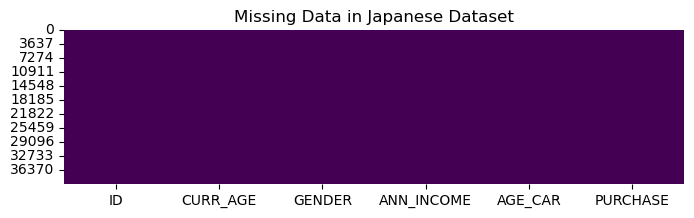

In [13]:
plt.figure(figsize=(8, 2))
sns.heatmap(japanese_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Japanese Dataset')
plt.show()

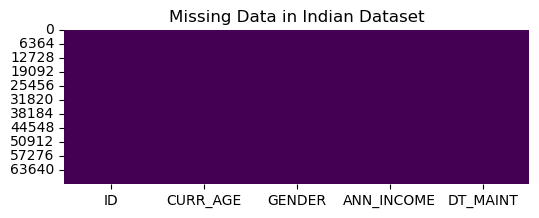

In [14]:
plt.figure(figsize=(6, 2))
sns.heatmap(Indian_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data in Indian Dataset')
plt.show()

##  Check for Irrelevant Data

In [15]:
Indian_data.columns

Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'DT_MAINT'], dtype='object')

In [16]:
japanese_data.columns

Index(['ID', 'CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR', 'PURCHASE'], dtype='object')

In [17]:
irrelevant_columns = ['ID', 'ANN_INCOME']
japanese_data_cleaned = japanese_data.drop(columns=[col for col in irrelevant_columns if col in japanese_data.columns])
indian_data_cleaned = Indian_data.drop(columns=[col for col in irrelevant_columns if col in Indian_data.columns])
japanese_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CURR_AGE  40000 non-null  int64 
 1   GENDER    40000 non-null  object
 2   AGE_CAR   40000 non-null  int64 
 3   PURCHASE  40000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


 ## Understand the Distributions of Different Variables


#### Distribution of Age (Current Age) in Indian Dataset

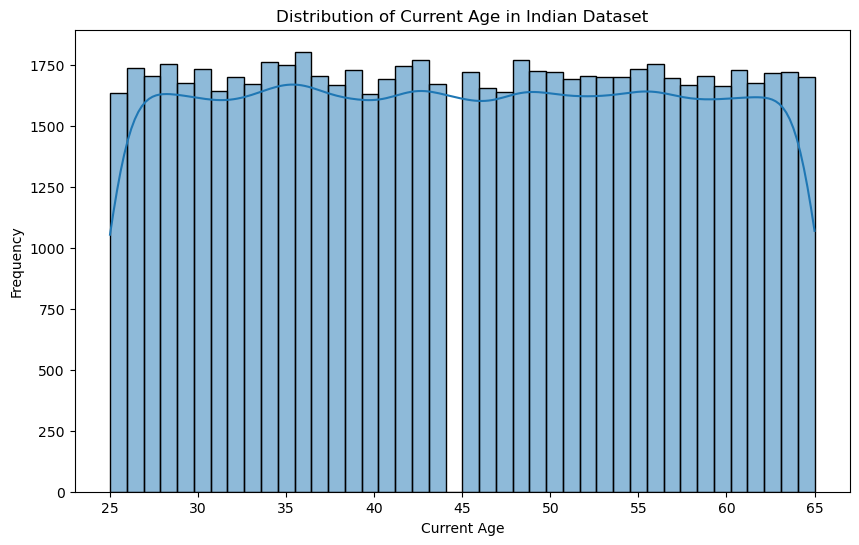

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(Indian_data['CURR_AGE'], kde=True)
plt.title('Distribution of Current Age in Indian Dataset')
plt.xlabel('Current Age')
plt.ylabel('Frequency')
plt.show()

####  Distribution of Age (Current Age) in Japanese Dataset

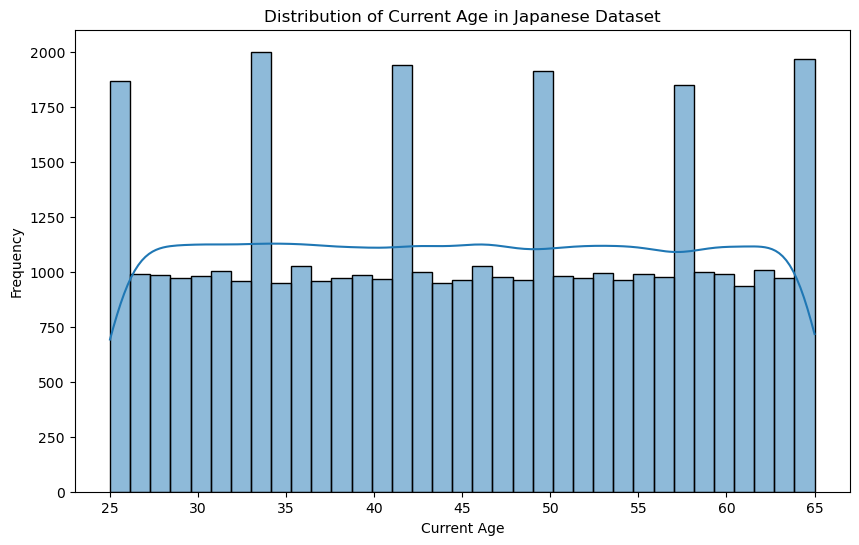

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(japanese_data['CURR_AGE'], kde=True)
plt.title('Distribution of Current Age in Japanese Dataset')
plt.xlabel('Current Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of Annual Income in Indian Dataset

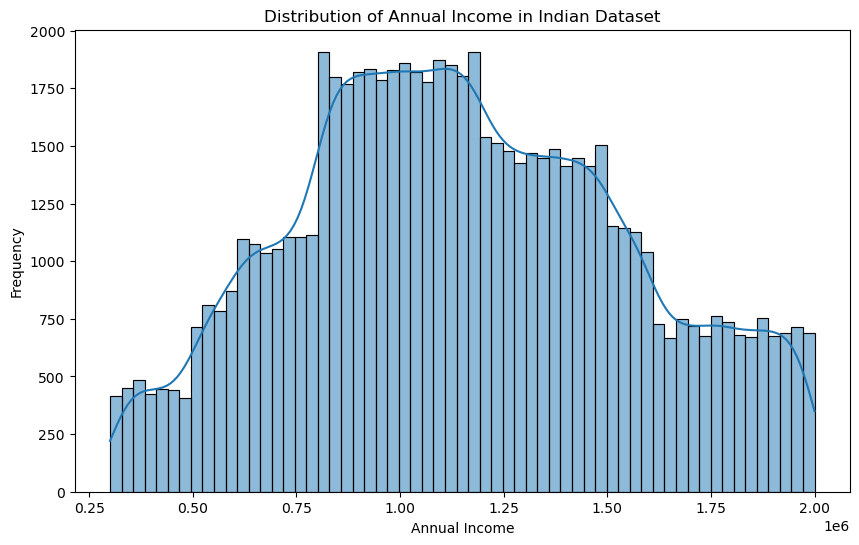

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(Indian_data['ANN_INCOME'], kde=True)
plt.title('Distribution of Annual Income in Indian Dataset')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

### Distribution of Annual Income in Japanese Dataset

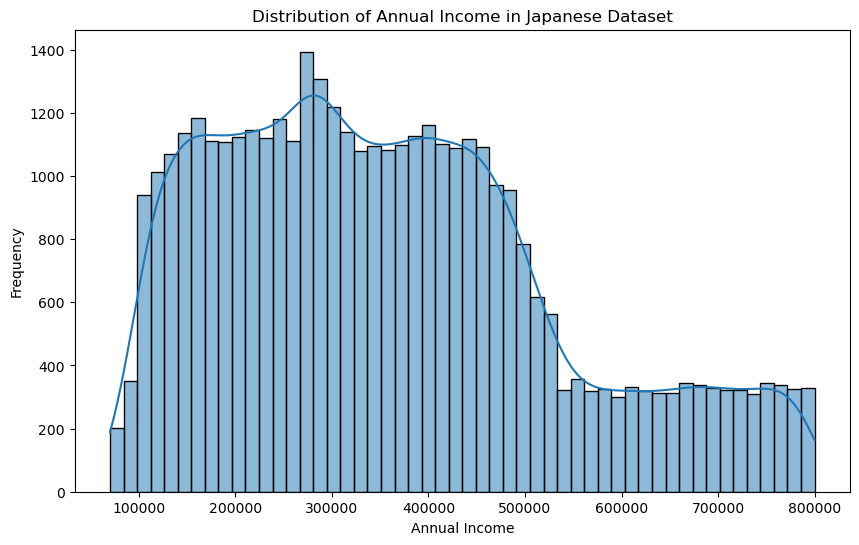

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(japanese_data['ANN_INCOME'], kde=True)
plt.title('Distribution of Annual Income in Japanese Dataset')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

### Distribution of Age of Car in Japanese Dataset

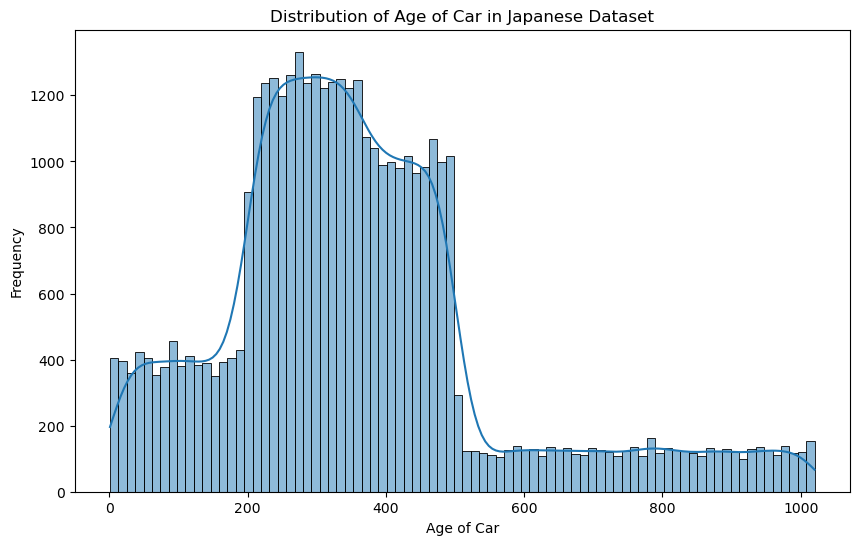

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(japanese_data['AGE_CAR'], kde=True)
plt.title('Distribution of Age of Car in Japanese Dataset')
plt.xlabel('Age of Car')
plt.ylabel('Frequency')
plt.show()

## Visualize Relationships Between Variables

#### Scatter plot between Age and Annual Income in Indian Dataset

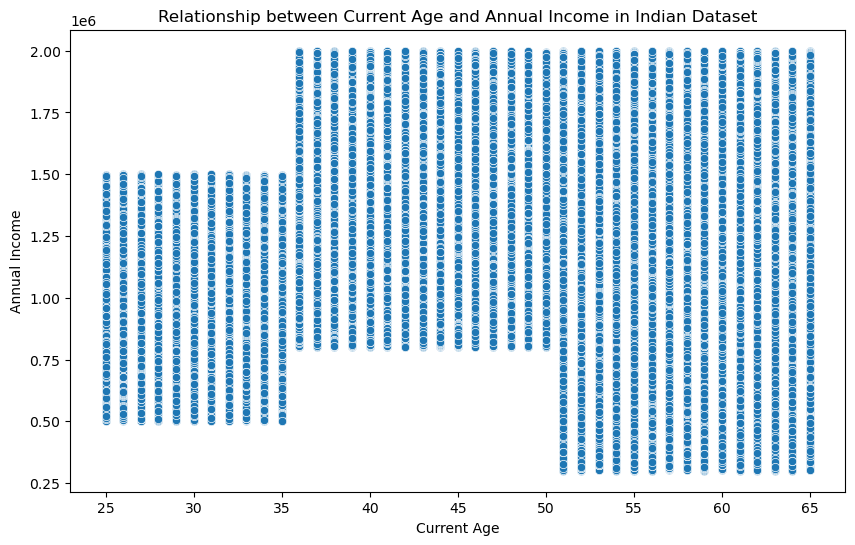

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Indian_data['CURR_AGE'], y=Indian_data['ANN_INCOME'])
plt.title('Relationship between Current Age and Annual Income in Indian Dataset')
plt.xlabel('Current Age')
plt.ylabel('Annual Income')
plt.show()

#### Scatter plot between Age and Annual Income in Japanese Dataset

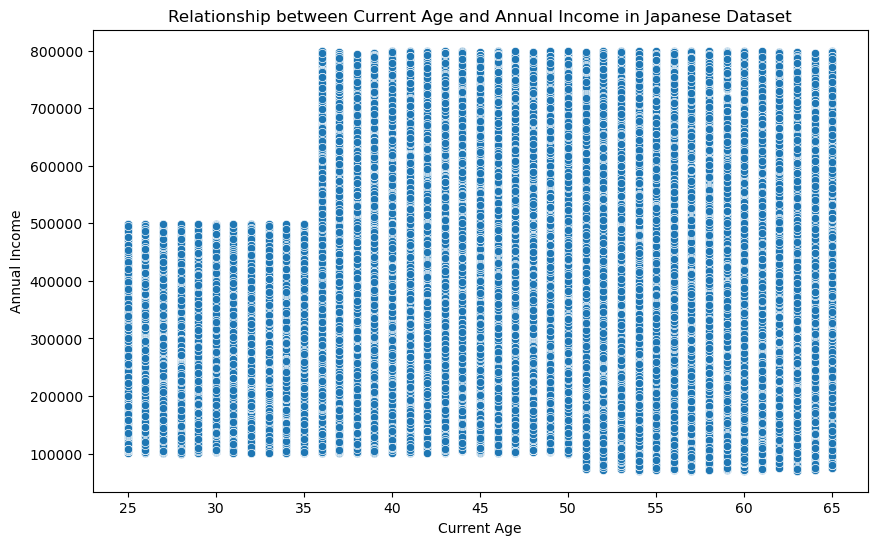

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=japanese_data['CURR_AGE'], y=japanese_data['ANN_INCOME'])
plt.title('Relationship between Current Age and Annual Income in Japanese Dataset')
plt.xlabel('Current Age')
plt.ylabel('Annual Income')
plt.show()

### Scatter plot between Age of Car and Annual Income in Japanese Dataset

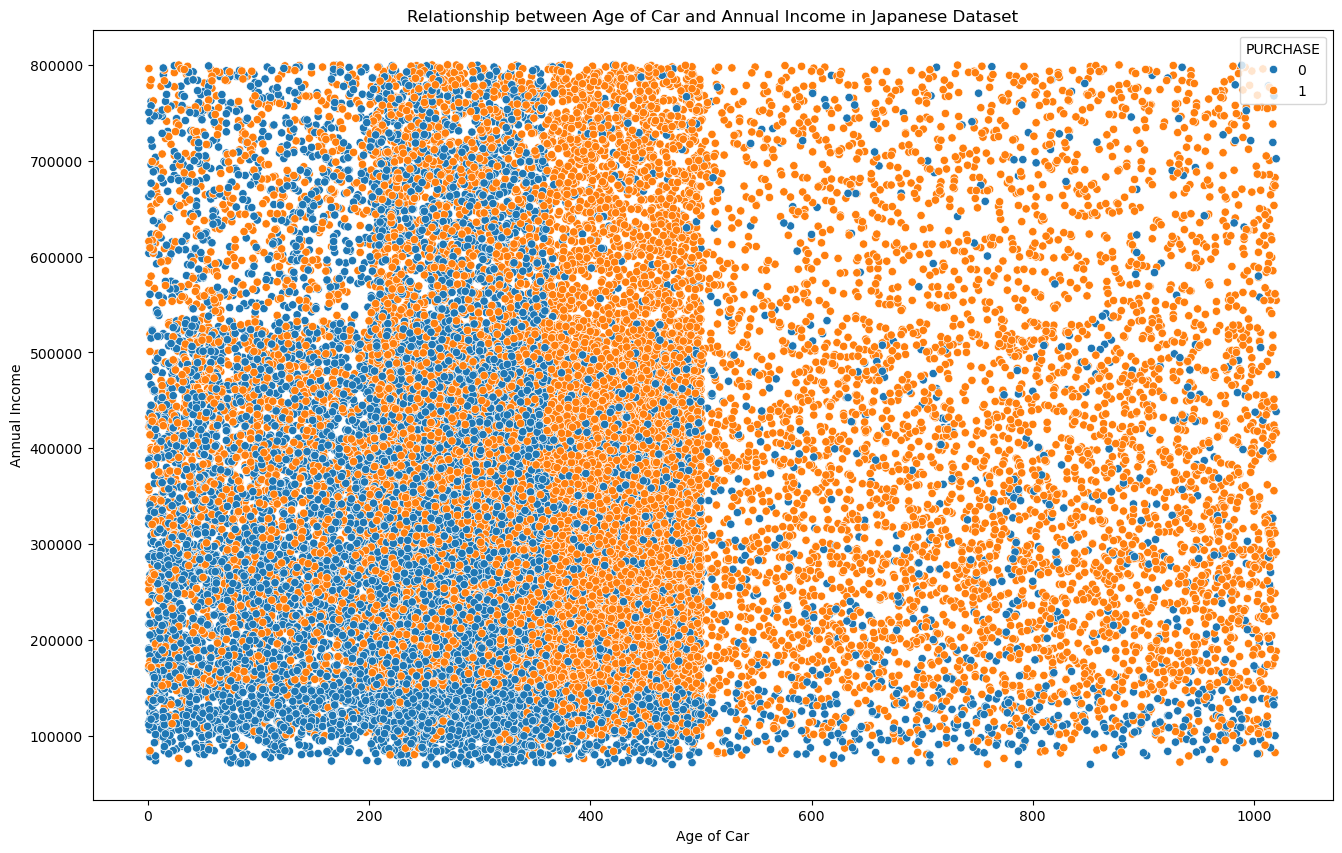

In [25]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=japanese_data['AGE_CAR'], y=japanese_data['ANN_INCOME'], hue=japanese_data['PURCHASE'])
plt.title('Relationship between Age of Car and Annual Income in Japanese Dataset')
plt.xlabel('Age of Car')
plt.ylabel('Annual Income')
plt.show()

#### Boxplot to show the distribution of Annual Income by Gender in Indian Dataset

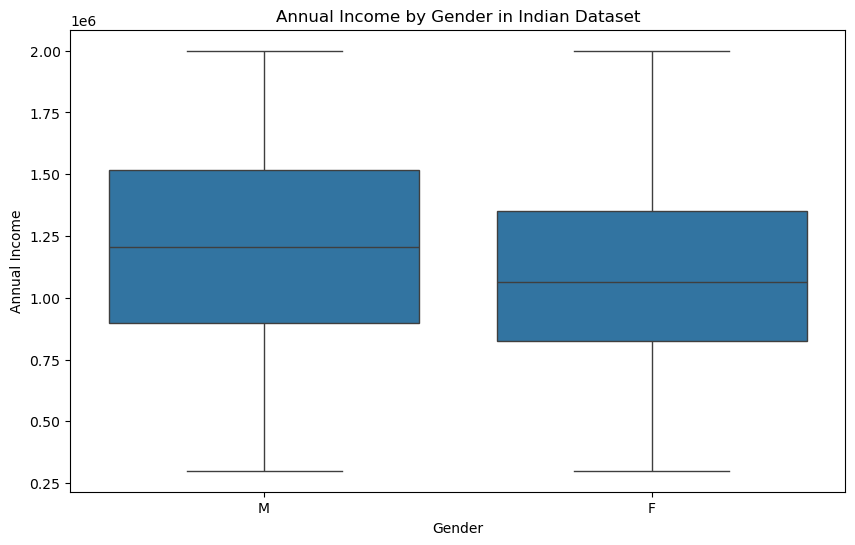

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=Indian_data['GENDER'], y=Indian_data['ANN_INCOME'])
plt.title('Annual Income by Gender in Indian Dataset')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

#### Boxplot to show the distribution of Annual Income by Gender in Japanese Dataset

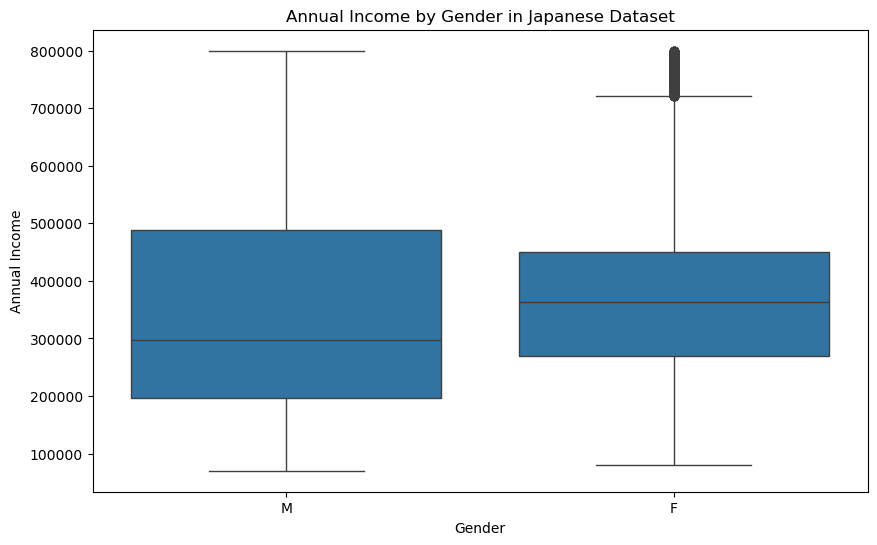

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=japanese_data['GENDER'], y=japanese_data['ANN_INCOME'])
plt.title('Annual Income by Gender in Japanese Dataset')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

## Identify Key Features that Influence Car Sales

#### Correlation matrix to identify relationships between variables in Japanese Dataset

In [28]:
numeric_cols = japanese_data.select_dtypes(include=['number']).columns
corr_matrix = japanese_data[numeric_cols].corr()

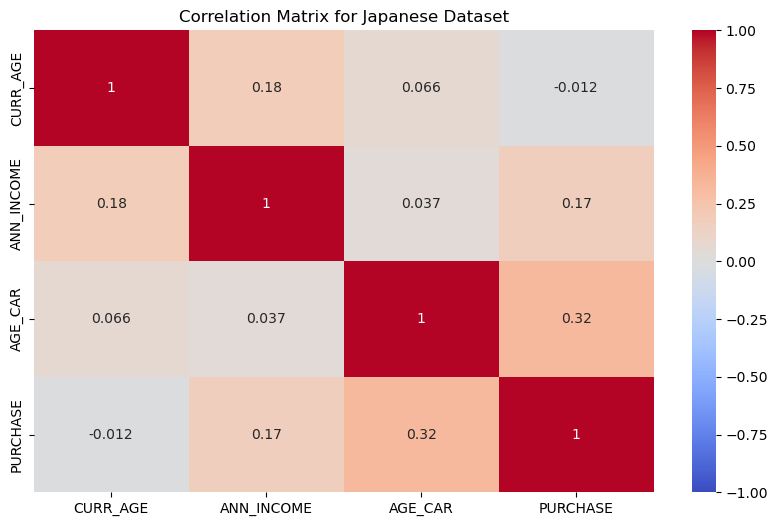

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Japanese Dataset')
plt.show()

#### Visualize purchase rates by different variables

#### Purchase rate by age group

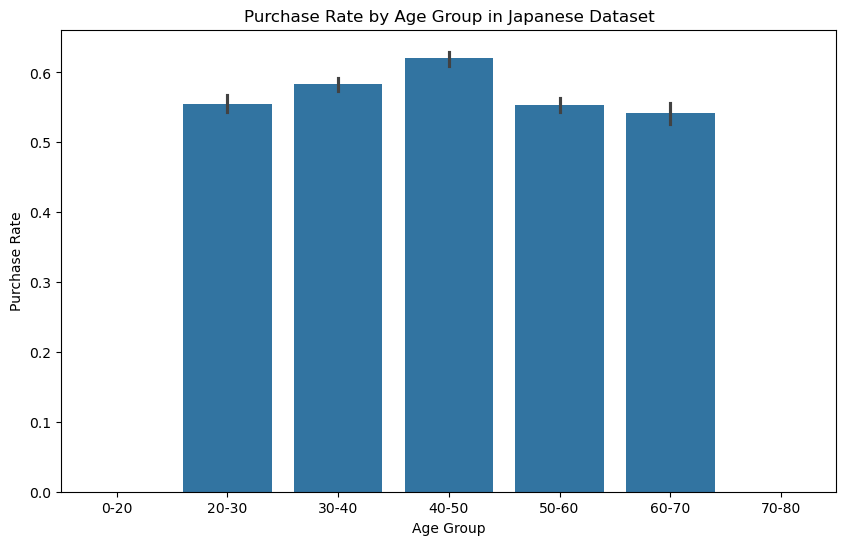

In [30]:
japanese_data['AGE_GROUP'] = pd.cut(japanese_data['CURR_AGE'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.figure(figsize=(10, 6))
sns.barplot(x=japanese_data['AGE_GROUP'], y=japanese_data['PURCHASE'])
plt.title('Purchase Rate by Age Group in Japanese Dataset')
plt.xlabel('Age Group')
plt.ylabel('Purchase Rate')
plt.show()

#### Purchase rate by annual income group

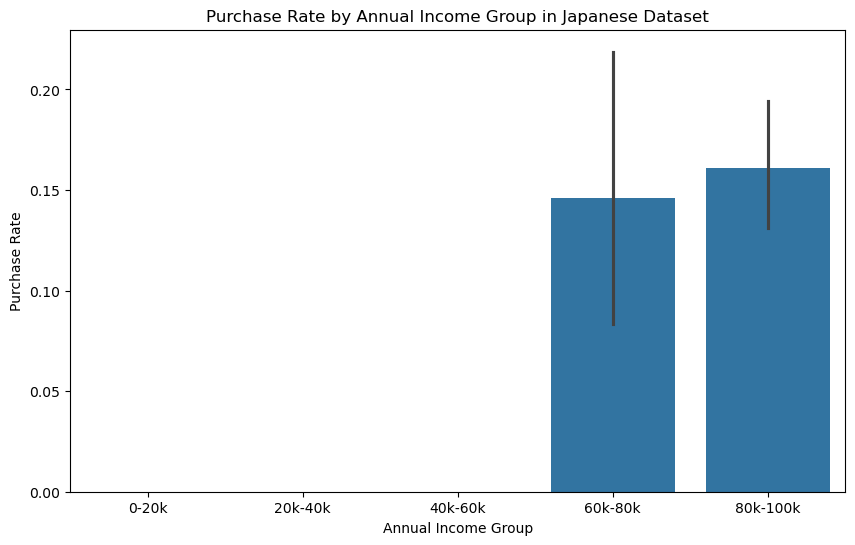

In [31]:
japanese_data['INCOME_GROUP'] = pd.cut(japanese_data['ANN_INCOME'], bins=[0, 20000, 40000, 60000, 80000, 100000], labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k'])
plt.figure(figsize=(10, 6))
sns.barplot(x=japanese_data['INCOME_GROUP'], y=japanese_data['PURCHASE'])
plt.title('Purchase Rate by Annual Income Group in Japanese Dataset')
plt.xlabel('Annual Income Group')
plt.ylabel('Purchase Rate')
plt.show()

#### Purchase rate by age of car

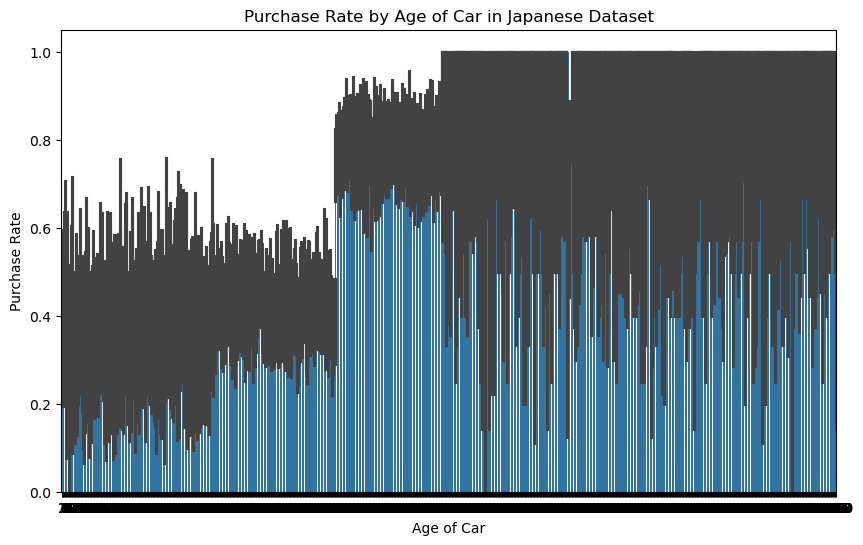

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=japanese_data_cleaned['AGE_CAR'], y=japanese_data_cleaned['PURCHASE'])
plt.title('Purchase Rate by Age of Car in Japanese Dataset')
plt.xlabel('Age of Car')
plt.ylabel('Purchase Rate')
plt.show()

## Load and Preprocess the Dataset

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer


In [34]:
japanese_data['GENDER'] = japanese_data['GENDER'].map({'Male': 0, 'Female': 1})

In [35]:
X = japanese_data[['CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_CAR']]
y = japanese_data['PURCHASE']

In [36]:
X.dtypes
y.dtypes

dtype('int64')

In [37]:
X = pd.get_dummies(X, columns=['GENDER'], drop_first=True)

In [38]:
y.unique()

array([0, 1], dtype=int64)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression

In [40]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [41]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.685625
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.60      3349
           1       0.71      0.78      0.74      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.67      0.67      8000
weighted avg       0.68      0.69      0.68      8000

Confusion Matrix:
 [[1852 1497]
 [1018 3633]]


###  Decision Tree

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.62875
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      3349
           1       0.68      0.67      0.68      4651

    accuracy                           0.63      8000
   macro avg       0.62      0.62      0.62      8000
weighted avg       0.63      0.63      0.63      8000

Confusion Matrix:
 [[1892 1457]
 [1513 3138]]


### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


### Hyperparameter Tuning for Logistic Regression

In [ ]:
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search_log_reg = GridSearchCV(LogisticRegression(), param_grid_log_reg, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_best_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_log_reg))


C:\Users\Pratik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pratik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Tuned Logistic Regression Accuracy: 0.685625
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.55      0.60      3349
           1       0.71      0.78      0.74      4651

    accuracy                           0.69      8000
   macro avg       0.68      0.67      0.67      8000
weighted avg       0.68      0.69      0.68      8000

Confusion Matrix:
 [[1852 1497]
 [1018 3633]]


### Hyperparameter Tuning for Decision Tree

In [ ]:
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_best_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_dt))

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.690125
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68      3349
           1       0.80      0.63      0.70      4651

    accuracy                           0.69      8000
   macro avg       0.70      0.70      0.69      8000
weighted avg       0.71      0.69      0.69      8000

Confusion Matrix:
 [[2606  743]
 [1736 2915]]


### Cross-validation for Logistic Regression

In [ ]:
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Logistic Regression:", cv_scores_log_reg)
print("Mean Cross-Validation Score for Logistic Regression:", np.mean(cv_scores_log_reg))


Cross-Validation Scores for Logistic Regression: [0.68275  0.66275  0.674875 0.669125 0.66    ]
Mean Cross-Validation Score for Logistic Regression: 0.6698999999999999


In [ ]:
cv_scores_dt = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Decision Tree:", cv_scores_dt)
print("Mean Cross-Validation Score for Decision Tree:", np.mean(cv_scores_dt))

Cross-Validation Scores for Decision Tree: [0.628375 0.619375 0.62875  0.63175  0.6275  ]
Mean Cross-Validation Score for Decision Tree: 0.6271500000000001


In [ ]:
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Random Forest:", cv_scores_rf)
print("Mean Cross-Validation Score for Random Forest:", np.mean(cv_scores_rf))

Cross-Validation Scores for Random Forest: [0.68125  0.66225  0.674375 0.673    0.669   ]
Mean Cross-Validation Score for Random Forest: 0.671975


In [ ]:
Indian_data['GENDER'] = Indian_data['GENDER'].map({'Male': 0, 'Female': 1, 'M': 0, 'F': 1})

In [ ]:
X_indian = Indian_data[['CURR_AGE', 'GENDER', 'ANN_INCOME']]

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_indian = imputer.fit_transform(X_indian)


In [ ]:
y_pred_indian = log_reg.predict(X_indian)

In [ ]:
num_potential_buyers = sum(y_pred_indian)
print(f"Number of potential buyers: {num_potential_buyers}")

Number of potential buyers: 70000


#  Business Interpretation

In [ ]:
if num_potential_buyers >= 12000:
    print(f"The estimated {num_potential_buyers} potential buyers in India exceed the target of 12,000 car sales.")
    print("This suggests that the Indian market has strong potential for car sales, and ABG Motors may be able to achieve its sales goals.")
    print("It would be beneficial for the company to focus marketing efforts on regions and demographics where interest in purchasing a car is highest.")
else:
    print(f"The estimated {num_potential_buyers} potential buyers in India do not meet the target of 12,000 car sales.")
    print("This indicates that the company may face challenges in meeting its sales target in India.")
    print("ABG Motors may need to explore other strategies, such as targeted advertising, offering incentives, or expanding into new regions.")


The estimated 70000 potential buyers in India exceed the target of 12,000 car sales.
This suggests that the Indian market has strong potential for car sales, and ABG Motors may be able to achieve its sales goals.
It would be beneficial for the company to focus marketing efforts on regions and demographics where interest in purchasing a car is highest.


# Final Report

### report conclusion